In [16]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [ ]:
# Load the data into a DataFrame
observations_df = pd.read_csv(file_path)

# Display basic information
print("Data successfully loaded!")
print(f"\nDataset shape: {observations_df.shape}")
print(f"\nColumn names: {observations_df.columns.tolist()}")
print("\nFirst 5 rows:")
print(observations_df.head())

# Display summary statistics
print("\nSummary statistics:")
print(observations_df.describe())

# Check for missing values
print("\nMissing values per column:")
print(observations_df.isnull().sum())

# Save the DataFrame to a variable for further analysis
# You can now use observations_df for any data analysis tasks

# Optional: Create a simple visualization if there are numeric columns
# Uncomment the following code if you want to create a plot

# Select numeric columns for plotting
numeric_cols = observations_df.select_dtypes(include=['number']).columns

if len(numeric_cols) > 0:
    plt.figure(figsize=(10, 6))
    observations_df[numeric_cols[:5]].hist(bins=15, figsize=(15, 10))
    plt.tight_layout()
    plt.savefig('observations_histograms.png')
    print("\nHistograms saved as 'observations_histograms.png'")


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Data successfully loaded!

Dataset shape: (1136, 22)

Column names: ['id', 'uuid', 'observed_on_string', 'observed_on', 'time_observed_at', 'time_zone', 'created_at', 'updated_at', 'quality_grade', 'tag_list', 'description', 'num_identification_agreements', 'num_identification_disagreements', 'captive_cultivated', 'latitude', 'longitude', 'positional_accuracy', 'species_guess', 'scientific_name', 'common_name', 'iconic_taxon_name', 'taxon_id']

First 5 rows:
       id                                  uuid  \
0   50306  9a78d024-2406-4410-a465-80e33f37af17   
1  141779  ff255b3b-6ca6-4e75-b0a2-fb2899945a6f   
2  143921  324b3dad-4857-4eed-9b7f-1c9eefb6892b   
3  199608  c682b129-56b8-4462-86c3-33485a02ef7d   
4  309179  f40c56bb-aac3-4fdc-abe4-90840d15bdd6   

              observed_on_string observed_on         time_observed_at  \
0                     2011-08-12  2011-08-12                      NaN   
1                     1984-07-02  1984-07-02                      NaN   
2          

NameError: name 'plt' is not defined

In [3]:
observations_df.head()

NameError: name 'observations_df' is not defined

Plot saved as 'monthly_observations.png'


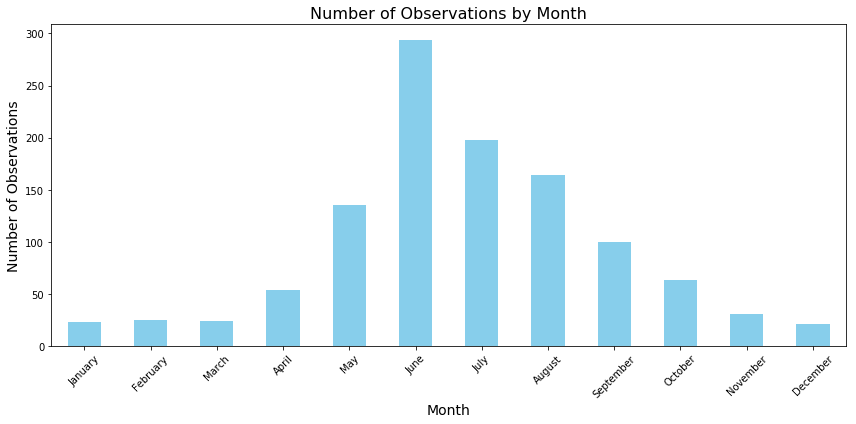


Observations by month:
January       23
February      25
March         24
April         54
May          135
June         294
July         198
August       164
September    100
October       63
November      31
December      21
Name: month_name, dtype: int64


In [ ]:
# Assuming there's a date column - replace 'observed_on' with your actual date column name
date_column = 'observed_on'  # Update this to match your actual date column

# Check if the date column exists
if date_column in observations_df.columns:
    # Convert to datetime
    observations_df[date_column] = pd.to_datetime(observations_df[date_column], errors='coerce')
    
    # Extract month and create a new column
    observations_df['month'] = observations_df[date_column].dt.month
    observations_df['month_name'] = observations_df[date_column].dt.month_name()
    
    # Count observations by month
    monthly_counts = observations_df['month_name'].value_counts().reindex([
        'January', 'February', 'March', 'April', 'May', 'June', 
        'July', 'August', 'September', 'October', 'November', 'December'
    ])
    
    # Create the plot
    plt.figure(figsize=(12, 6))
    monthly_counts.plot(kind='bar', color='skyblue')
    plt.title('Number of Observations by Month', fontsize=16)
    plt.xlabel('Month', fontsize=14)
    plt.ylabel('Number of Observations', fontsize=14)
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    # Save and show the plot
    plt.savefig('monthly_observations.png')
    print("Plot saved as 'monthly_observations.png'")
    plt.show()
    
    # Also show the data
    print("\nObservations by month:")
    print(monthly_counts)
else:
    print(f"Date column '{date_column}' not found. Available columns are: {observations_df.columns.tolist()}")
    
    # Try to identify potential date columns
    potential_date_cols = [col for col in observations_df.columns if 'date' in col.lower() 
                          or 'time' in col.lower() or 'day' in col.lower() 
                          or 'month' in col.lower() or 'year' in col.lower()]
    
    if potential_date_cols:
        print(f"\nPotential date columns found: {potential_date_cols}")
        print("Please update the 'date_column' variable with one of these column names.")

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, time

# Assuming observations_df already has your data with a datetime column
# If not, you'll need to load your data first

# First, let's check what columns we have to identify the datetime column
print("Available columns:")
print(observations_df.columns.tolist())

# Identify the datetime column (adjust this based on your actual column name)
date_column = 'observed_on'  # Change this to your actual datetime column name

# Check if the column exists and is in datetime format
if date_column in observations_df.columns:
    # Convert to datetime if it's not already
    if not pd.api.types.is_datetime64_any_dtype(observations_df[date_column]):
        observations_df[date_column] = pd.to_datetime(observations_df[date_column], errors='coerce')
    
    # Extract hour of day
    observations_df['hour'] = observations_df[date_column].dt.hour
    
    # Count observations by hour
    hourly_counts = observations_df['hour'].value_counts().sort_index()
    
    # Create the plot
    plt.figure(figsize=(14, 7))
    ax = hourly_counts.plot(kind='bar', color='forestgreen')
    
    # Add labels and title
    plt.title('Moose Observations by Hour of Day', fontsize=16)
    plt.xlabel('Hour of Day (24-hour format)', fontsize=14)
    plt.ylabel('Number of Observations', fontsize=14)
    plt.xticks(rotation=0)
    plt.grid(True, axis='y', alpha=0.3)
    
    # Add data labels
    for i, count in enumerate(hourly_counts):
        ax.text(i, count + 0.5, str(count), ha='center')
    
    # Highlight dawn and dusk periods (approximate)
    plt.axvspan(5, 8, alpha=0.2, color='yellow', label='Dawn (5-8 AM)')
    plt.axvspan(17, 20, alpha=0.2, color='orange', label='Dusk (5-8 PM)')
    plt.legend()
    
    # Add annotations for peak times
    peak_hour = hourly_counts.idxmax()
    plt.annotate(f"Peak hour: {peak_hour}:00 with {hourly_counts[peak_hour]} observations",
                xy=(peak_hour, hourly_counts[peak_hour]),
                xytext=(peak_hour, hourly_counts[peak_hour] + hourly_counts.max() * 0.15),
                arrowprops=dict(facecolor='black', shrink=0.05, width=1.5),
                ha='center', fontsize=12)
    
    plt.tight_layout()
    plt.savefig('moose_observations_by_hour.png')
    print("Plot saved as 'moose_observations_by_hour.png'")
    plt.show()
    
    # Print summary statistics
    print("\nMoose Observations by Hour of Day:")
    for hour, count in hourly_counts.items():
        am_pm = "AM" if hour < 12 else "PM"
        h12 = hour if hour < 12 else hour - 12
        if h12 == 0:
            h12 = 12
        print(f"{h12} {am_pm}: {count} observations")
    
    # Calculate percentages for day vs night
    day_hours = range(6, 18)  # 6 AM to 6 PM
    day_count = hourly_counts[hourly_counts.index.isin(day_hours)].sum()
    night_count = hourly_counts[~hourly_counts.index.isin(day_hours)].sum()
    total = day_count + night_count
    
    print(f"\nDay vs Night Analysis:")
    print(f"Daytime (6 AM - 6 PM): {day_count} observations ({day_count/total*100:.1f}%)")
    print(f"Nighttime (6 PM - 6 AM): {night_count} observations ({night_count/total*100:.1f}%)")
    
else:
    print(f"Column '{date_column}' not found in the dataset.")
    print("Available columns:")
    print(observations_df.columns.tolist())
    
    # Try to identify potential date/time columns
    potential_date_cols = [col for col in observations_df.columns if 'date' in col.lower() 
                          or 'time' in col.lower() or 'day' in col.lower() 
                          or 'hour' in col.lower() or 'observed' in col.lower()]
    
    if potential_date_cols:
        print(f"\nPotential date/time columns found: {potential_date_cols}")
        print("Please update the 'date_column' variable with one of these column names.")

Available columns:


NameError: name 'observations_df' is not defined

Plot saved as 'moose_observations_trend.png'


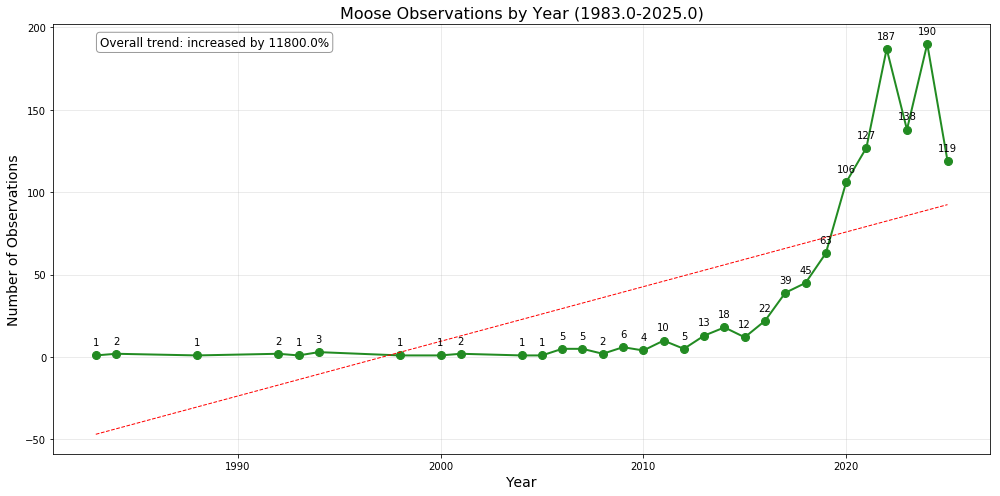


Moose Observations by Year:
1983.0      1
1984.0      2
1988.0      1
1992.0      2
1993.0      1
1994.0      3
1998.0      1
2000.0      1
2001.0      2
2004.0      1
2005.0      1
2006.0      5
2007.0      5
2008.0      2
2009.0      6
2010.0      4
2011.0     10
2012.0      5
2013.0     13
2014.0     18
2015.0     12
2016.0     22
2017.0     39
2018.0     45
2019.0     63
2020.0    106
2021.0    127
2022.0    187
2023.0    138
2024.0    190
2025.0    119
Name: year, dtype: int64

Trend Analysis:
First year (1983.0): 1 observations
Last year (2025.0): 119 observations
Change: increased by 11800.0%
Average annual change: 2.81 observations per year

Potential date columns found: ['time_observed_at', 'time_zone', 'updated_at', 'month', 'month_name', 'year']
Please update the 'date_column' variable with one of these column names.


In [ ]:
# Extract year and create a new column
observations_df['year'] = observations_df[date_column].dt.year

# Count observations by year
yearly_counts = observations_df['year'].value_counts().sort_index()

# Create the plot
plt.figure(figsize=(14, 7))
ax = yearly_counts.plot(kind='line', marker='o', linewidth=2, markersize=8, color='forestgreen')

# Add a trend line
z = np.polyfit(yearly_counts.index, yearly_counts.values, 1)
p = np.poly1d(z)
plt.plot(yearly_counts.index, p(yearly_counts.index), "r--", linewidth=1)

# Calculate percent change from first to last year
first_year = yearly_counts.index.min()
last_year = yearly_counts.index.max()
percent_change = ((yearly_counts[last_year] - yearly_counts[first_year]) / yearly_counts[first_year]) * 100

# Add annotations
plt.title(f'Moose Observations by Year ({first_year}-{last_year})', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Observations', fontsize=14)
plt.grid(True, alpha=0.3)

# Add text showing the trend
trend_direction = "increased" if percent_change > 0 else "decreased"
plt.annotate(f"Overall trend: {trend_direction} by {abs(percent_change):.1f}%",
            xy=(0.05, 0.95), xycoords='axes fraction',
            fontsize=12, bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

# Add data labels
for year, count in yearly_counts.items():
    ax.annotate(f"{count}", 
                (year, count),
                textcoords="offset points",
                xytext=(0,10), 
                ha='center')

plt.tight_layout()
plt.savefig('moose_observations_trend.png')
print("Plot saved as 'moose_observations_trend.png'")
plt.show()

# Print summary statistics
print("\nMoose Observations by Year:")
print(yearly_counts)

print(f"\nTrend Analysis:")
print(f"First year ({first_year}): {yearly_counts[first_year]} observations")
print(f"Last year ({last_year}): {yearly_counts[last_year]} observations")
print(f"Change: {trend_direction} by {abs(percent_change):.1f}%")

# Calculate average annual change
avg_annual_change = (yearly_counts[last_year] - yearly_counts[first_year]) / (last_year - first_year)
print(f"Average annual change: {avg_annual_change:.2f} observations per year")


# Try to identify potential date columns
potential_date_cols = [col for col in observations_df.columns if 'date' in col.lower() 
                        or 'time' in col.lower() or 'day' in col.lower() 
                        or 'month' in col.lower() or 'year' in col.lower()]

if potential_date_cols:
    print(f"\nPotential date columns found: {potential_date_cols}")
    print("Please update the 'date_column' variable with one of these column names.")